In [ ]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

# Cargar el archivo Excel en un DataFrame
file_path = "SP500_datos1y.xlsx"
df = pd.read_excel(file_path, sheet_name="s&p500")

# Convertir la columna de fechas a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la fecha como índice para análisis de series temporales
df.set_index('Date', inplace=True)

# Ordenar el DataFrame por fecha por si no estuviera en orden cronológico
df = df.sort_index()

# Mostrar las primeras filas del DataFrame
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2024-02-05,4942.810059,4957.189941,4918.089844,4957.189941,4023640000
2024-02-06,4954.229980,4957.770020,4934.879883,4950.160156,4440880000
2024-02-07,4995.060059,4999.890137,4969.049805,4973.049805,4895590000
2024-02-08,4997.910156,5000.399902,4987.089844,4995.160156,4341860000
2024-02-09,5026.609863,5030.060059,5000.339844,5004.169922,3912990000


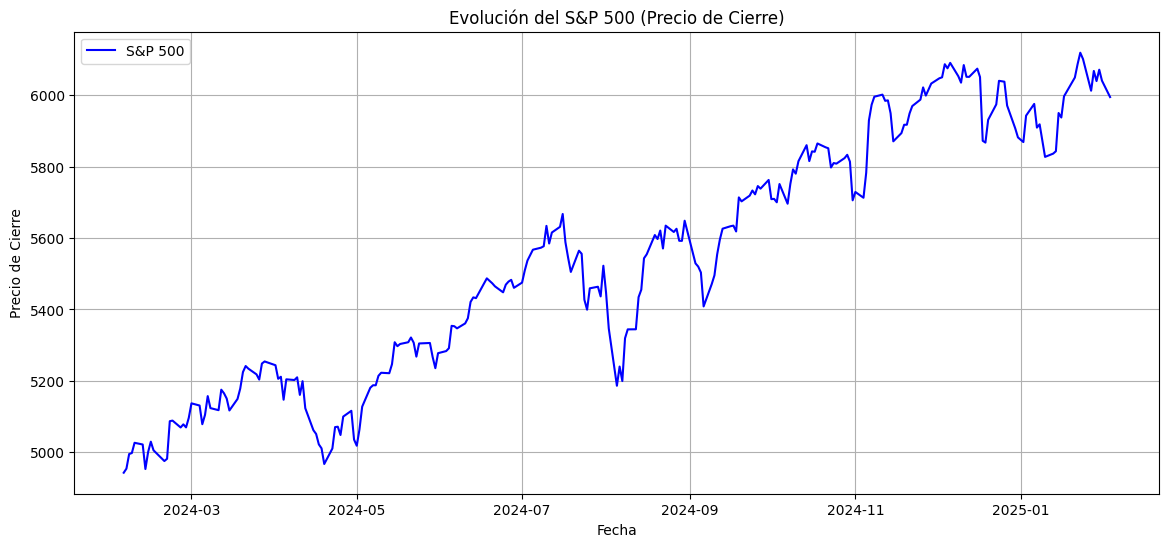

In [ ]:
# Graficar la evolución del S&P 500
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label="S&P 500", color='b')
plt.title("Evolución del S&P 500 (Precio de Cierre)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid()
plt.show()


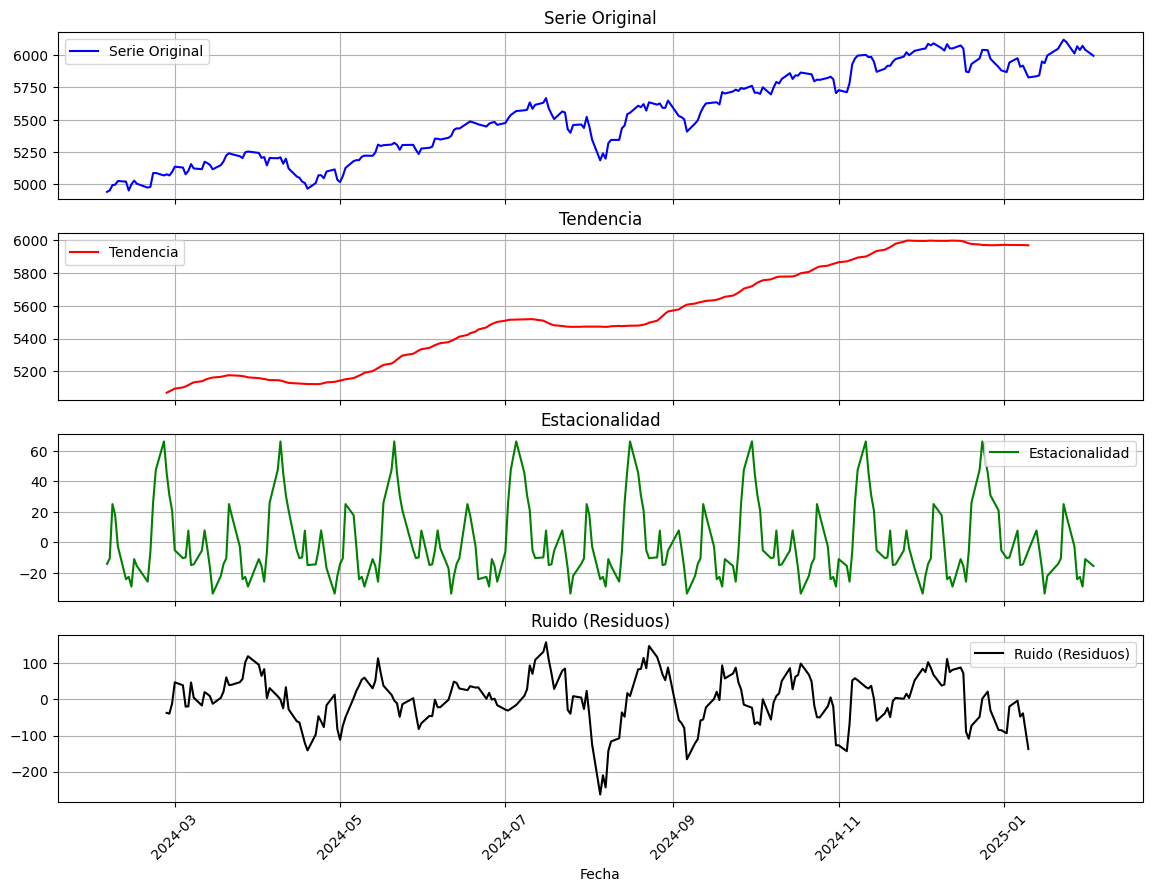

In [ ]:
# Descomposición de la serie temporal
decomp = seasonal_decompose(df['Close'], model='additive', period=30)  # Suponemos un ciclo mensual

# Graficar la descomposición
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Serie original
axes[0].plot(df.index, df['Close'], label="Serie Original", color='b')
axes[0].set_title("Serie Original")
axes[0].legend()
axes[0].grid()

# Tendencia
axes[1].plot(df.index, decomp.trend, label="Tendencia", color='r')
axes[1].set_title("Tendencia")
axes[1].legend()
axes[1].grid()

# Estacionalidad
axes[2].plot(df.index, decomp.seasonal, label="Estacionalidad", color='g')
axes[2].set_title("Estacionalidad")
axes[2].legend()
axes[2].grid()

# Ruido (residuos)
axes[3].plot(df.index, decomp.resid, label="Ruido (Residuos)", color='k')
axes[3].set_title("Ruido (Residuos)")
axes[3].legend()
axes[3].grid()

# Ajustar el formato de la fecha en el eje X
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.xlabel("Fecha")  # Agregar etiqueta de fecha en el eje X

plt.show()



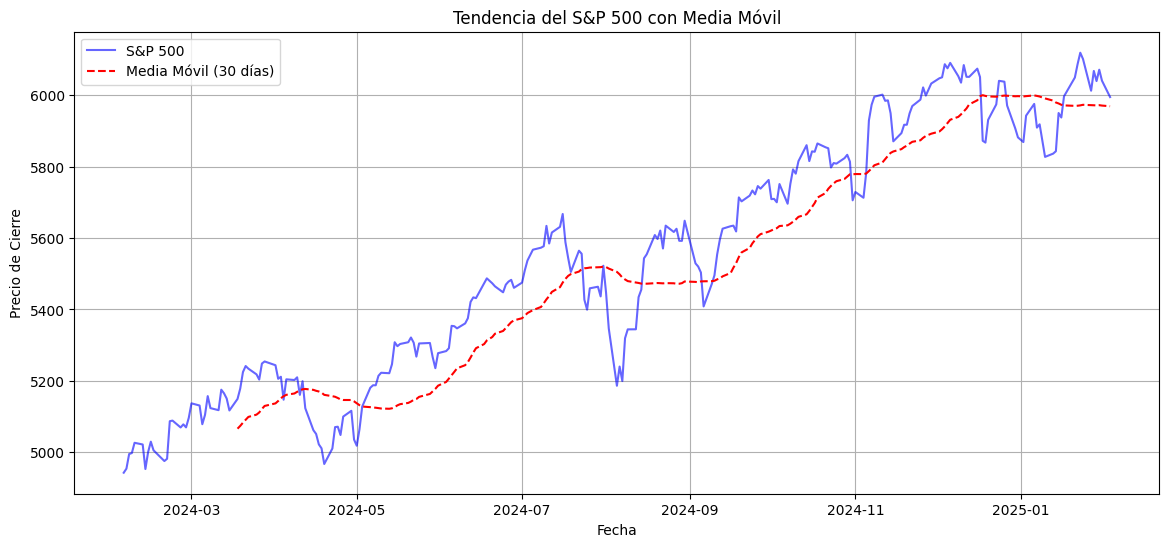

In [ ]:
# Aplicar una media móvil de 30 días
df['MA30'] = df['Close'].rolling(window=30).mean()

# Graficar la media móvil junto con el precio real
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label="S&P 500", color='b', alpha=0.6)
plt.plot(df['MA30'], label="Media Móvil (30 días)", color='r', linestyle="dashed")
plt.title("Tendencia del S&P 500 con Media Móvil")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid()
plt.show()


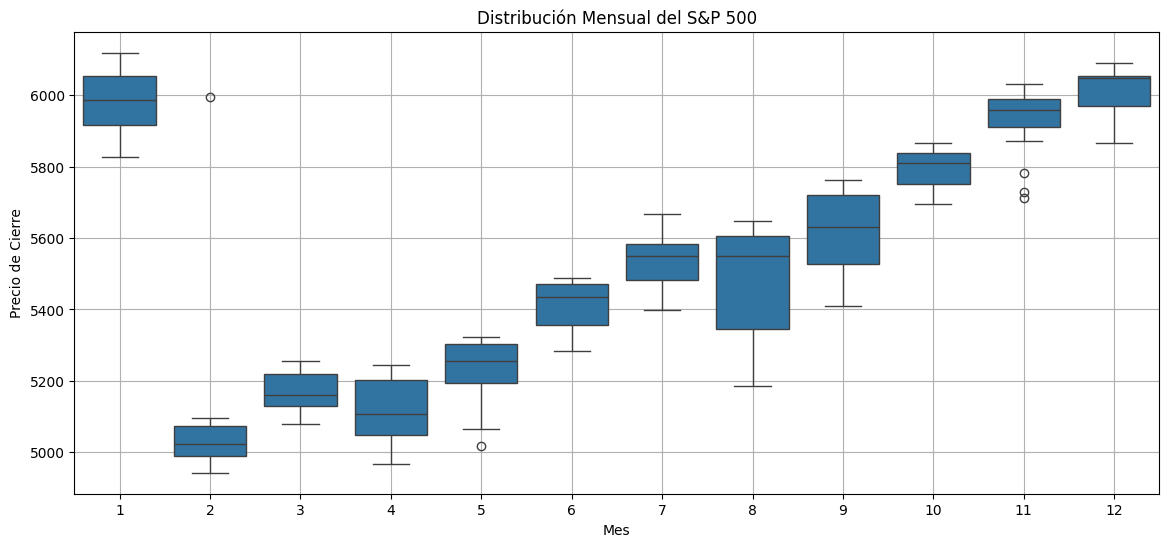

In [ ]:
# Extraer el mes de cada registro
df['Month'] = df.index.month

# Crear un boxplot por mes
plt.figure(figsize=(14,6))
sns.boxplot(x=df['Month'], y=df['Close'])
plt.title("Distribución Mensual del S&P 500")
plt.xlabel("Mes")
plt.ylabel("Precio de Cierre")
plt.grid()
plt.show()


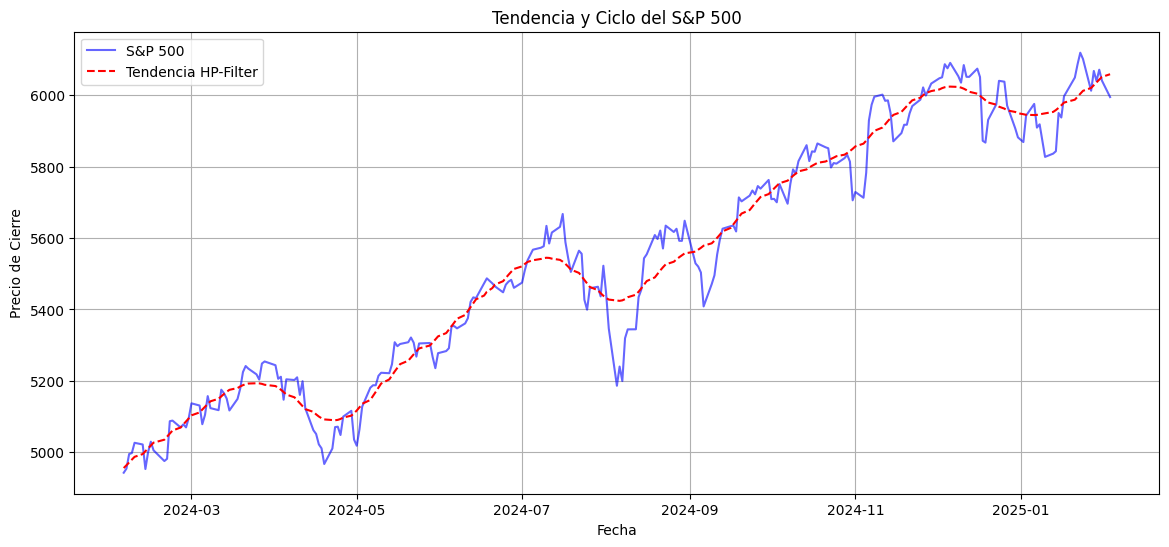

In [ ]:
# Aplicar el filtro de Hodrick-Prescott
cycle, trend = hpfilter(df['Close'], lamb=1600)

# Graficar tendencia y ciclo
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label="S&P 500", color='b', alpha=0.6)
plt.plot(trend, label="Tendencia HP-Filter", color='r', linestyle="dashed")
plt.title("Tendencia y Ciclo del S&P 500")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.legend()
plt.grid()
plt.show()


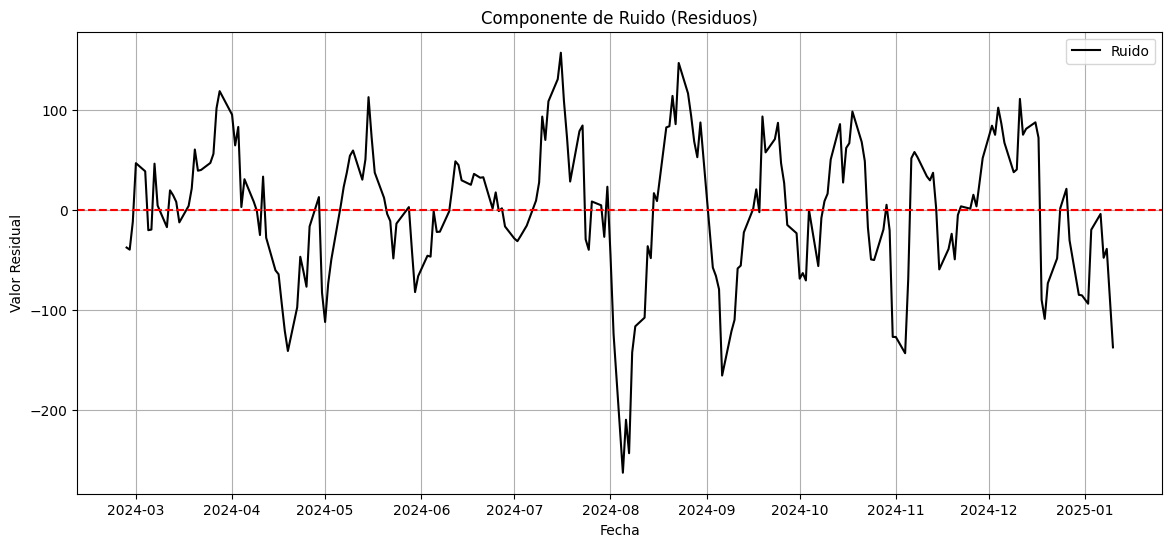

In [ ]:
# Graficar la serie residual de la descomposición
plt.figure(figsize=(14,6))
plt.plot(decomp.resid, label="Ruido", color='k')
plt.axhline(0, linestyle="dashed", color='r')
plt.title("Componente de Ruido (Residuos)")
plt.xlabel("Fecha")
plt.ylabel("Valor Residual")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter


# Función para realizar el test de Dickey-Fuller
def test_dickey_fuller(series):
    result = adfuller(series, autolag='AIC')
    print("📊 Test de Dickey-Fuller Aumentado:")
    print(f"Estadístico de prueba: {result[0]}")
    print(f"Valor p: {result[1]}")
    print(f"Valores Críticos:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

    if result[1] <= 0.05:
        print("\n✅ La serie es ESTACIONARIA (rechazamos H₀).")
    else:
        print("\n❌ La serie es NO ESTACIONARIA (no se puede rechazar H₀).")

# Aplicar el test de Dickey-Fuller al precio de cierre
test_dickey_fuller(df['Close'])


📊 Test de Dickey-Fuller Aumentado:
Estadístico de prueba: -1.3087876082033407
Valor p: 0.6251424439695327
Valores Críticos:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876

❌ La serie es NO ESTACIONARIA (no se puede rechazar H₀).


📊 Test de Dickey-Fuller Aumentado:
Estadístico de prueba: -15.160277043156176
Valor p: 6.605639983913383e-28
Valores Críticos:
   1%: -3.4569962781990573
   5%: -2.8732659015936024
   10%: -2.573018897632674

✅ La serie es ESTACIONARIA (rechazamos H₀).


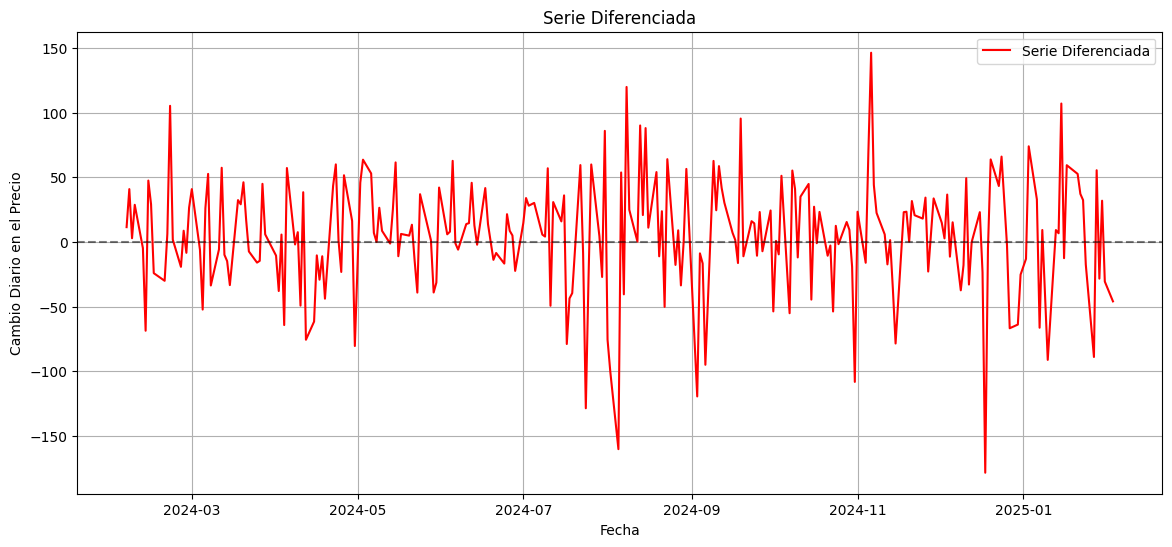

In [ ]:
df['Close_diff'] = df['Close'].diff()

# Volver a aplicar el test de Dickey-Fuller
test_dickey_fuller(df['Close_diff'].dropna())


# Graficar la serie diferenciada
plt.figure(figsize=(14,6))
plt.plot(df['Close_diff'], label="Serie Diferenciada", color='r')
plt.axhline(0, linestyle="dashed", color='black', alpha=0.5)  # Línea en cero para referencia
plt.title("Serie Diferenciada")
plt.xlabel("Fecha")
plt.ylabel("Cambio Diario en el Precio")
plt.legend()
plt.grid()
plt.show()


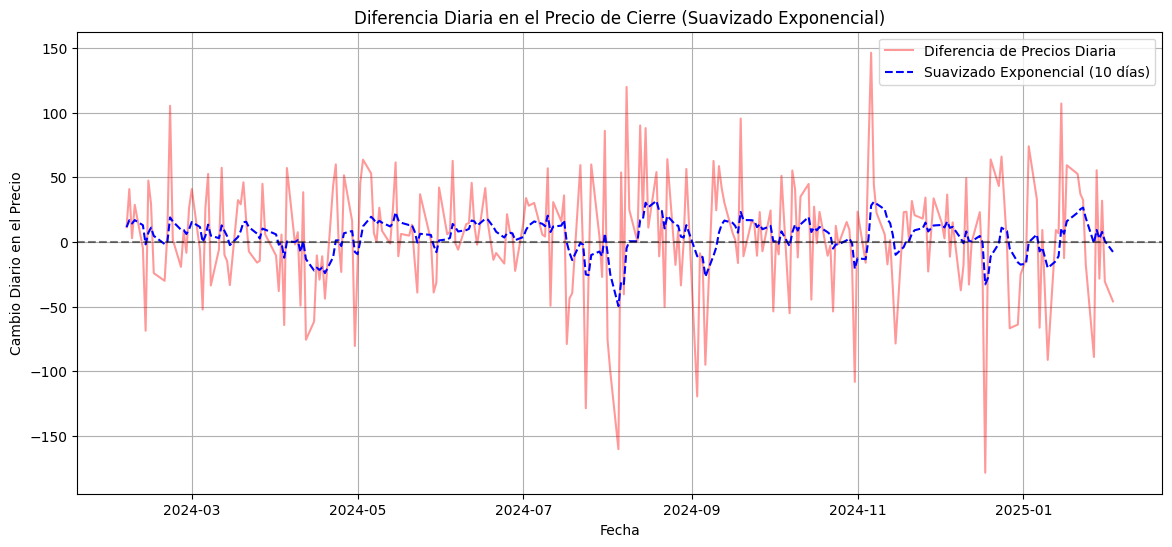

In [ ]:
df['Close_diff_ema'] = df['Close_diff'].ewm(span=10, adjust=False).mean()  # Suavizado exponencial

# Graficar la serie diferenciada con suavizado exponencial
plt.figure(figsize=(14,6))
plt.plot(df['Close_diff'], label="Diferencia de Precios Diaria", color='r', alpha=0.4)
plt.plot(df['Close_diff_ema'], label="Suavizado Exponencial (10 días)", color='b', linestyle="dashed")
plt.axhline(0, linestyle="dashed", color='black', alpha=0.5)
plt.title("Diferencia Diaria en el Precio de Cierre (Suavizado Exponencial)")
plt.xlabel("Fecha")
plt.ylabel("Cambio Diario en el Precio")
plt.legend()
plt.grid()
plt.show()


📊 Test de Dickey-Fuller Aumentado:
Estadístico de prueba: -15.21917592211064
Valor p: 5.5159573097554785e-28
Valores Críticos:
   1%: -3.4569962781990573
   5%: -2.8732659015936024
   10%: -2.573018897632674

✅ La serie es ESTACIONARIA (rechazamos H₀).


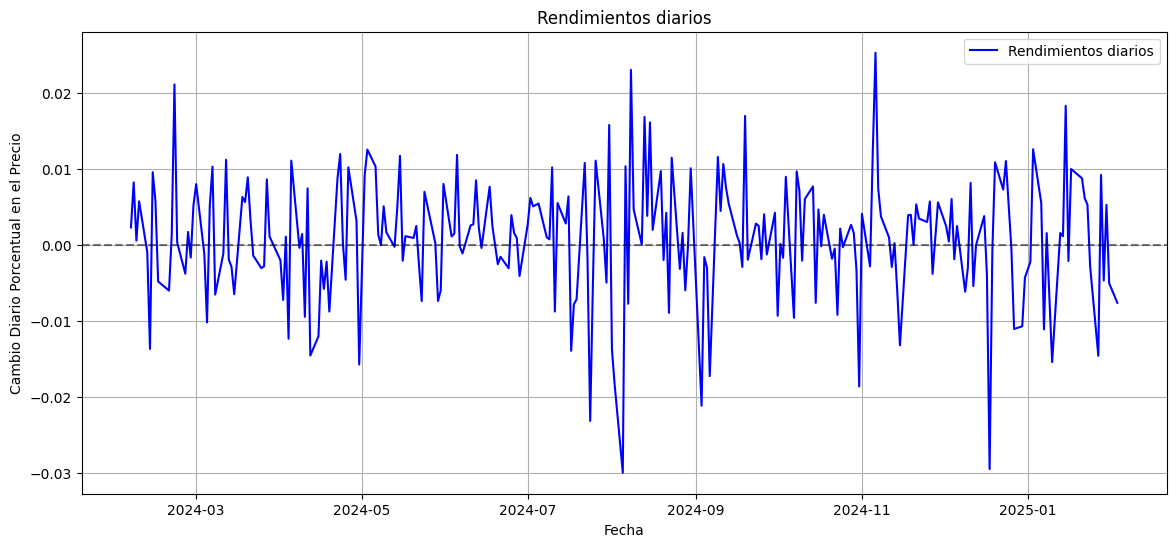

In [ ]:
# Calcular los rendimientos diarios
df["Returns"] = df["Close"].pct_change().dropna()

# Volver a aplicar el test de Dickey-Fuller
test_dickey_fuller(df['Returns'].dropna())

# Graficar la serie diferenciada
plt.figure(figsize=(14,6))
plt.plot(df['Returns'], label="Rendimientos diarios", color='b')
plt.axhline(0, linestyle="dashed", color='black', alpha=0.5)  # Línea en cero para referencia
plt.title("Rendimientos diarios")
plt.xlabel("Fecha")
plt.ylabel("Cambio Diario Porcentual en el Precio")
plt.legend()
plt.grid()
plt.show()
